In [19]:
from visualization_fct import *
from sklearn.mixture import BayesianGaussianMixture

# from bokeh.plotting import output_file, show, save
# from bokeh.mpl import to_bokeh

from bokeh.resources import CDN
from bokeh.embed import file_html

import matplotlib.pyplot as plt  # , mpld3
import pyfits


only_flux = False
scale_data = True

hdulist = pyfits.open('../iirc_data/all_data_for_ml.fits')
data = hdulist[1].data

#data=data[500:]

X_flux, X, data_thr, data_fr_en = get_iirc_data(
    data, only_flux=only_flux, scale_data=scale_data, thresholded=True)[:4]

# VBGMM with 3 components: 
#np.random.seed(0)

XX = X[:, 78:]

gmm = BayesianGaussianMixture(n_components=10, alpha_prior=0.0000001, random_state=0, n_init=10).fit(XX)
preds = gmm.predict(XX)
probs = gmm.predict_proba(XX)

data_thr['preds'] = pd.Series(preds).astype("category")

color_key = ["red", "yellow", "blue", "grey", "black", "purple", "pink",
             "brown", "green", "orange"] * 2  # Spectral9
#color_key = color_key[:len(set(preds))+1]

means = gmm.means_

print(np.bincount(preds))
print len(np.bincount(preds))
print(gmm.weights_)

[177  99 333  86  17  43 260   3  11  83]
10
[ 0.15989344  0.08914509  0.30163974  0.07791753  0.0153654   0.03861272
  0.2302286   0.00269787  0.00987733  0.07462228]


In [20]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit(X).transform(X)

Loading BokehJS ...

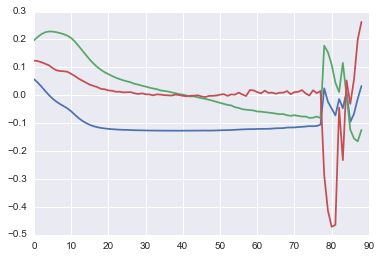

In [22]:
%matplotlib inline
plt.figure()
plt.plot(pca.components_.T)
plt.show()

In [23]:
x = 5
y = 0
covs_xy = [covs[j][[x, y]][:, [x, y]] for j in range(len(covs))]
means_xy = [means[j][[x, y]] for j in range(len(covs))]

p = bokeh_plot_cov(data_thr, covs=covs_xy, means=means_xy,
                   x_name='5',
                   y_name='0',
                   pred_name='preds', title=None,  # try preds -> y
                   plot_width=900, plot_height=300)
show(p)

In [21]:
data_thr['pca1'] = X_pca[:, 0]
data_thr['pca2'] = X_pca[:, 1]
data_thr['pca3'] = X_pca[:, 2]

means =  gmm.means_
covs = gmm.covariances_
print 'set(preds)=', set(preds)
print 'gmm.weights_=', gmm.weights_

#data5 = pd.DataFrame({name: data_thr[name] for name in ['0', '20', '40', '70', 'preds']})
data5 = pd.DataFrame({name: data_thr[name] for name in ['pca1', 'pca2', 'pca3']})
data5['preds'] = pd.Series(preds).astype("category")

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit(X).transform(X)

covs_ = np.array([pca.transform(pca.transform(covs[j].T).T) for j in range(covs.shape[0])])
means_ = np.array([pca.transform(means[j].reshape(1,-1)).T for j in range(means.shape[0])])

p = scatter_matrix(data5, covs=covs_, means=means_, color_key=color_key, covs_indices=['pca1', 'pca2', 'pca3'],
                   plot_width=200, plot_height=200, spread=True, datashader=False)
show(p)

set(preds)= set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
gmm.weights_= [ 0.15989344  0.08914509  0.30163974  0.07791753  0.0153654   0.03861272
  0.2302286   0.00269787  0.00987733  0.07462228]


ValueError: operands could not be broadcast together with shapes (11,11) (89,) 